In [1]:
# kernel: wwa_xesmf
import sys; sys.path.append('..'); from wwa import *

xn,xx,yn,yx = [105,160,-10,45]

fpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/synda_clair/data/CMIP6/"
outpath = "/rds/general/user/cb2714/home/99_ephemera/cmip6_"

---
# Check available models
```
synda search variable=tos,ta,hus,psl -l 10000 > ~/wwa/24-08+typhoon-gaemi/cmip6-pi-vars.txt
```

Model list to use in defaults (duplicates removed):
`source_id=CESM2,CESM2-WACCM,CMCC-CM2-SR5,CMCC-ESM2,CNRM-CM6-1,CNRM-CM6-1-HR,CNRM-ESM2-1,CanESM5,EC-Earth3,EC-Earth3-CCIPSL-CM6A-LR,MIROC6,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM`


In [2]:
df = pd.read_table("cmip6-pi-vars.txt", sep = "\.", engine = "python", header = None,
                  names = [0,"activity","institute","source_id","experiment","variant_label","table", "variable", "grid", "version"])

In [3]:
# identify models with all required variables available in both historical & SSP experiments
nvars = 5

mdl_xvar = df[["source_id", "variant_label", "variable", "experiment"]].drop_duplicates()
mdl_xvar = mdl_xvar.groupby(["source_id", "variant_label"]).count().reset_index()

mdl_xvar = mdl_xvar.loc[mdl_xvar.variable == (2*nvars)]

In [4]:
mdl_xvar

,source_id,variant_label,variable,experiment
8,CESM2,r10i1p1f1,10,10
9,CESM2,r11i1p1f1,10,10
13,CESM2,r4i1p1f1,10,10
23,CESM2-WACCM,r1i1p1f1,10,10
24,CESM2-WACCM,r2i1p1f1,10,10
...,...,...,...,...
385,MRI-ESM2-0,r5i1p1f1,10,10
390,NESM3,r1i1p1f1,10,10
391,NESM3,r2i1p1f1,10,10
395,NorESM2-LM,r1i1p1f1,10,10


In [5]:
# filter models to show only those with all four variables
df = pd.merge(df, mdl_xvar, left_on = ["source_id", "variant_label"], right_on = ["source_id", "variant_label"], how = "inner")

# get list of model variants to include in synda download
print("c+p into synda defaults file:")
"source_id="+",".join(sorted(df.source_id.drop_duplicates().to_list()))

c+p into synda defaults file:


'source_id=CESM2,CESM2-WACCM,CMCC-CM2-SR5,CMCC-ESM2,CNRM-CM6-1,CNRM-CM6-1-HR,CNRM-ESM2-1,CanESM5,EC-Earth3,EC-Earth3-CC,EC-Earth3-Veg,EC-Earth3-Veg-LR,IPSL-CM6A-LR,MIROC6,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM'

In [6]:
len(df.source_id.drop_duplicates())

20

In [7]:
# which variant labels provide most runs?
nmod = df.groupby(["variant_label"]).count()[["source_id"]] / (nvars*2)
nmod.sort_values("source_id")

,source_id
variant_label,
r6i1p1f2,1.3
r9i1p2f1,1.8
r2i1p2f1,1.8
r3i1p2f1,1.8
r5i1p2f1,1.8
...,...
r6i1p1f1,7.2
r4i1p1f1,10.4
r3i1p1f1,13.2


In [8]:
# list models with all available data for run r1i1p1f1 (this is the single most commonly used label)
df.loc[df.variant_label == "r1i1p1f1", ["source_id", "grid"]].drop_duplicates().sort_values("source_id")

,source_id,grid
661,CESM2-WACCM,gn
660,CESM2-WACCM,gr
2101,CMCC-CM2-SR5,gn
2111,CMCC-ESM2,gn
648,CanESM5,gn
388,EC-Earth3,gr
390,EC-Earth3,gn
348,EC-Earth3-CC,gr
350,EC-Earth3-CC,gn
282,EC-Earth3-Veg,gn


In [9]:
# count of model variants
df[["source_id", "variant_label"]].drop_duplicates().groupby(["source_id"]).count()

,variant_label
source_id,
CESM2,3
CESM2-WACCM,3
CMCC-CM2-SR5,1
CMCC-ESM2,1
CNRM-CM6-1,5
CNRM-CM6-1-HR,1
CNRM-ESM2-1,5
CanESM5,20
EC-Earth3,8


---
# List downloaded models

In [2]:
fl = sorted(glob.glob("/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/synda_clair/data/CMIP6/*/*/*.nc"))
df = pd.DataFrame([fnm.split("/")[-1].split("_") for fnm in fl], columns = ["variable", "frequency", "source_id", "experiment", "ensemble_id", "grid", "timeslice"])

# filter only the variables we actually need for the potential intensity
df = df.loc[[v in ["tos","hus","ta","psl"] for v in df.variable]]

In [3]:
# progress
pd.crosstab(index = df.source_id, columns = df.variable)

variable,hus,psl,ta,tos
source_id,,,,
CESM2,3,0,0,2
CESM2-WACCM,0,0,2,0
CMCC-CM2-SR5,126,11,126,26
CMCC-ESM2,126,11,126,26
CanESM5,26,2,26,26
EC-Earth3,251,251,251,251
EC-Earth3-CC,86,86,71,99
EC-Earth3-Veg,251,251,251,251
EC-Earth3-Veg-LR,251,251,251,251


In [4]:
df["ys"] = [int(t[:4]) for t in df.timeslice]
df["ye"] = [int(t[9:13]) for t in df.timeslice]

In [5]:
df = merge_byindex([df[["source_id", "variable", "ys"]].groupby(["source_id", "variable"]).min(),
                       df[["source_id", "variable", "ye"]].groupby(["source_id", "variable"]).max()]).reset_index()

In [6]:
# list models with data spanning the minimum period required for all four variables
mcount = df.loc[(df.ys <= 1900) & (df.ye >= 2050)].groupby(["source_id"]).count()[["variable"]]
mlist = mcount.loc[mcount.variable == 4].index.to_list()
mlist = [m for m in mlist if not "Veg" in m]

In [7]:
mlist

['CMCC-CM2-SR5',
 'CMCC-ESM2',
 'CanESM5',
 'EC-Earth3',
 'IPSL-CM6A-LR',
 'MIROC6',
 'MPI-ESM1-2-HR',
 'MPI-ESM1-2-LR',
 'NorESM2-LM',
 'NorESM2-MM']

## Extract data subset

### SSTs

In [ ]:
outpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/potential-intensity/tos/"

fl = sorted(glob.glob(fpath+"*/tos/*gn*.nc"))
c = 0
for fnm in fl:
    
    if "Earth3" in fnm: continue
    
    # only print 50 filnames at a time
    c = c+1
    if c == 50:
        clear_output(wait = False)
        c = 0
        
    print(fnm.split("/")[-1])
    new_fnm = outpath + fnm.split("/")[-1]
    if os.path.exists(new_fnm): continue

    ds = xr.open_dataset(fnm)
    if "longitude" in ds.coords: ds = ds.rename({"longitude" : "lon", "latitude" : "lat"})
    if "nav_lon" in ds.coords: ds = ds.rename({"nav_lon" : "lon", "nav_lat" : "lat"})

    box = np.logical_and(np.logical_and(ds.lon >= xn, ds.lon <= xx), np.logical_and(ds.lat >= yn, ds.lat <= yx))
    
    if "i" in ds.dims:
        xdim,ydim = ["i","j"]
    else:
        xdim,ydim = ["x","y"]
    box = box.where(box == 1).dropna(xdim, "all").dropna(ydim,"all")

    ds = ds.sel({xdim : box[xdim], ydim : box[ydim]}).tos
    ds.to_netcdf(new_fnm)
    
clear_output(wait = False)
print("Done.")

### Other variables

In [ ]:
units = {"psl" : "hPa", "ta" : "degC", "hus" : "g/kg"}

fpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/synda_clair/data/CMIP6/"

for mdl in mlist:
    
    if "Earth3" in mdl: continue
        
    for varnm in ["psl", "ta", "hus"]:

        outpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/potential-intensity/"+varnm+"/"
        fl = sorted(glob.glob(fpath+"*/"+varnm+"/*"+mdl+"_*.nc"))

        for fnm in fl:

            print(fnm.split("/")[-1])
            new_fnm = outpath + fnm.split("/")[-1]

            if os.path.exists(new_fnm): continue

            ds = xr.open_dataset(fnm)
            if "longitude" in ds.coords: ds = ds.rename({"longitude" : "lon", "latitude" : "lat"})
            if "plev" in ds.dims: ds["plev"] = convert_units_to(ds.plev, "hPa")

            ds = ds.sel(lon = slice(xn,xx), lat = slice(yn,yx))[varnm]
            ds = convert_units_to(ds, units[varnm])
            ds.to_netcdf(new_fnm)

        clear_output(wait = False)
print("Done.")

ta_day_IPSL-CM6A-LR_historical_r1i1p1f1_gr_18500101-19491231.nc
ta_day_IPSL-CM6A-LR_historical_r1i1p1f1_gr_19500101-20141231.nc


### Regrid tos from unstructured to structured grid

Using xesmf: https://pavics-sdi.readthedocs.io/en/latest/notebooks/regridding.html

In [ ]:
import xesmf as xe

In [ ]:
fpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/potential-intensity/"

fl = glob.glob(fpath+"tos/*.nc")
c = 0

fl = [fnm for fnm in fl if "NorESM" in fnm]

for fnm in fl:

    # only print 50 filnames at a time
    c = c+1
    if c == 50:
        clear_output(wait = False)
        c = 0
        
    print(fnm.split("/")[-1])
    new_fnm = re.sub("tos", "tos-rg", fnm)
    if os.path.exists(new_fnm): continue

    # load SLP file (if there is one) to get target lat-lon grid
    tmplt_fl = glob.glob(fpath+"psl/*"+fnm.split("_")[5]+"*.nc")
    if len(tmplt_fl) == 0: continue

    tmplt = xr.open_dataset(glob.glob(fpath+"psl/*"+fnm.split("_")[5]+"*.nc")[0]).isel(time = 0).reset_coords(drop = True)

    # load SSTs, convert to degrees, add CF attributes to allow regridding
    tos = convert_units_to(xr.open_mfdataset(fnm).tos, "degC")
    
    if "i" in tos.dims:
        xdim,ydim = ["i","j"]
    else:
        xdim,ydim = ["x","y"]
        
    tos[xdim].attrs['axis'] = 'X'
    tos[ydim].attrs['axis'] = 'Y'

    # regrid SSTs to regular land-sea mask grid
    rg = xe.Regridder(tos, tmplt, "bilinear", ignore_degenerate = True)
    tos_rg = rg(tos)

    # subset region & save
    tos_rg = tos_rg.sel(lon = slice(xn,xx), lat = slice(yn,yx)).assign_attrs(units = "degC").rename("sst").astype("float32")
    tos_rg.to_netcdf(new_fnm)

clear_output(wait = False)
print("Done.")

## Compute potential intensity

In [10]:
# kernel: potint
import xarray as xr, os, glob
import warnings; warnings.filterwarnings("ignore", category = FutureWarning)

from tcpyPI import pi
from tcpyPI.utilities import *

outpath = "/rds/general/user/cb2714/home/00_WWA_project_folder/ephemeral/potential-intensity/"

In [18]:
mlist = list(set([fnm.split("_")[5] for fnm in glob.glob(outpath+"tos-rg/*")]))

In [18]:
for mdl in mlist[:1]:
    print(mdl)
    
    hus = xr.open_datase

In [ ]:
# extract smaller domain for Gaemi to speed up PI calculation
xn,xx,yn,yx = [105,160,-10,45]

for y in range(1930,2060,10):
    
    hus = xr.open_dataset(outpath+"hus/hus_"+mdl+"_"+str(y)+"-"+str(y+9)+".nc").hus#.sel(lon = slice(xn,xx), lat = slice(yn,yx))
    ta = xr.open_dataset(outpath+"ta/ta_"+mdl+"_"+str(y)+"-"+str(y+9)+".nc").ta#.sel(lon = slice(xn,xx), lat = slice(yn,yx))
    tos = xr.open_dataset(outpath+"tos/tos-rg_"+mdl+"_"+str(y)+"-"+str(y+9)+".nc").tos#.sel(lon = slice(xn,xx), lat = slice(yn,yx))
    psl = xr.open_dataset(outpath+"psl/psl_"+mdl+"_"+str(y)+"-"+str(y+9)+".nc").psl#.sel(lon = slice(xn,xx), lat = slice(yn,yx))
    
    ds_d = xr.merge([tos, psl, ta, hus]).rename(plev = "p", ta = "t", hus = "q", psl = "msl", tos = "sst").load()

    for yy in range(y,y+10):
    
        new_fnm = outpath+"pi/pi_"+mdl+"_"+str(yy)+".nc"
        if os.path.exists(new_fnm): continue
            
        ds = ds_d.sel(time = str(yy))

        # calculate the potential intensity
        vmax, pmin, ifl, t0, otl = xr.apply_ufunc(
            pi,
            ds['sst'], ds['msl'], ds['p'], ds['t'], ds['q'],
            kwargs=dict(CKCD=0.9, ascent_flag=0, diss_flag=1, ptop=50, miss_handle=1),  # used default value of CKCD = 0.9
            input_core_dims=[
                [], [], ['p', ], ['p', ], ['p', ],
            ],
            output_core_dims=[
                [], [], [], [], []
            ],
            vectorize=True
        )

        # store the result in an xarray data structure
        ds_out = xr.Dataset({
            'vmax': vmax, 
            'pmin': pmin,
            'ifl': ifl,
            't0': t0,
            'otl': otl,
            })

        ds_out.to_netcdf(new_fnm)

---
# Exploratory plots

In [39]:
ds = xr.open_dataset("/rds/general/user/cb2714/home/99_ephemera/cmip6_pi/pi-gaemi_CMCC-ESM2_1930.nc").isel(time = 0)
track = pd.read_csv("stormtrack_gaemi.txt", comment = "#", sep = "\t", engine = "python", parse_dates = ["Date", "Time"])

tos = xr.open_dataset("sst/tos_CMCC-ESM2.nc").sel(time = "1930").isel(time = 0).tos

Text(0.5, 1.0, 'tos')

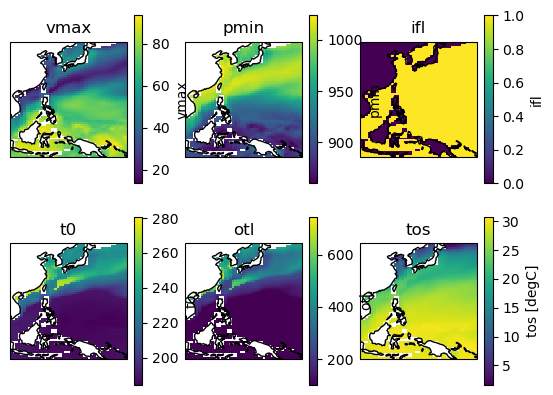

In [43]:
fig, axs = plt.subplots(ncols = 3, nrows = 2, dpi = 100, subplot_kw = {"projection" : cartopy.crs.PlateCarree()})

for ax in fig.axes:
    ax.coastlines()
#     ax.scatter(track.Lon, track.Lat, color = "darkred")
    
ax = fig.axes[0]; ds.vmax.plot(ax = ax); ax.set_title("vmax")
ax = fig.axes[1]; ds.pmin.plot(ax = ax); ax.set_title("pmin")
ax = fig.axes[2]; ds.ifl.plot(ax = ax); ax.set_title("ifl")
ax = fig.axes[3]; ds.t0.plot(ax = ax); ax.set_title("t0")
ax = fig.axes[4]; ds.otl.plot(ax = ax); ax.set_title("otl")
ax = fig.axes[5]; tos.plot(ax = ax); ax.set_title("tos")

In [2]:
ds1 = xr.open_mfdataset("/rds/general/user/cb2714/home/99_ephemera/cmip6_pi/pi_*.nc").sel(lon = slice(xn,xx), lat = slice(yn,yx)).vmax
ds2 = xr.open_mfdataset("/rds/general/user/cb2714/home/99_ephemera/cmip6_pi/pi-gaemi_CMCC-ESM2_*.nc").vmax
ds = xr.concat([ds1,ds2], "time").astype("float32")

ds.astype("float32").to_netcdf("pi/pi_CMCC-ESM2.nc") # change from float64 to float32 saves 0.8gb storage